In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [3]:
df= pd.read_csv('kidney_disease (1).csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [3]:


# Drop ID column if it exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Identify column types
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if col in numerical_cols:
            df[col].fillna(df[col].mean(), inplace=True)
        elif col in categorical_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Final check
print("Preprocessing complete. Data preview:")
display(df.head())


Preprocessing complete. Data preview:


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,0.36489,0.484322,-0.342518,-0.241249,-3.619875e-01,...,0.575394,0.293204,0.424844,1.311903,1.209416,-0.276686,-0.507801,-0.484322,-0.420084,-0.780813
1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,0.36489,0.484322,-0.342518,-0.241249,1.598721e-16,...,-0.147993,-0.286322,0.424844,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,-0.780813
2,0.620313,0.262338,-1.381391,0.773613,2.479925,0.36489,0.484322,-0.342518,-0.241249,3.681441e+00,...,-0.991944,0.220763,0.424844,-0.762252,1.209416,-0.276686,1.969276,-0.484322,2.380476,-0.780813
3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,0.36489,-2.064742,2.919556,-0.241249,-4.155428e-01,...,-0.871379,-0.069000,-1.153525,1.311903,-0.518321,-0.276686,1.969276,2.064742,2.380476,-0.780813
4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,0.36489,0.484322,-0.342518,-0.241249,-5.628200e-01,...,-0.509686,0.148322,-0.311728,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,-0.780813


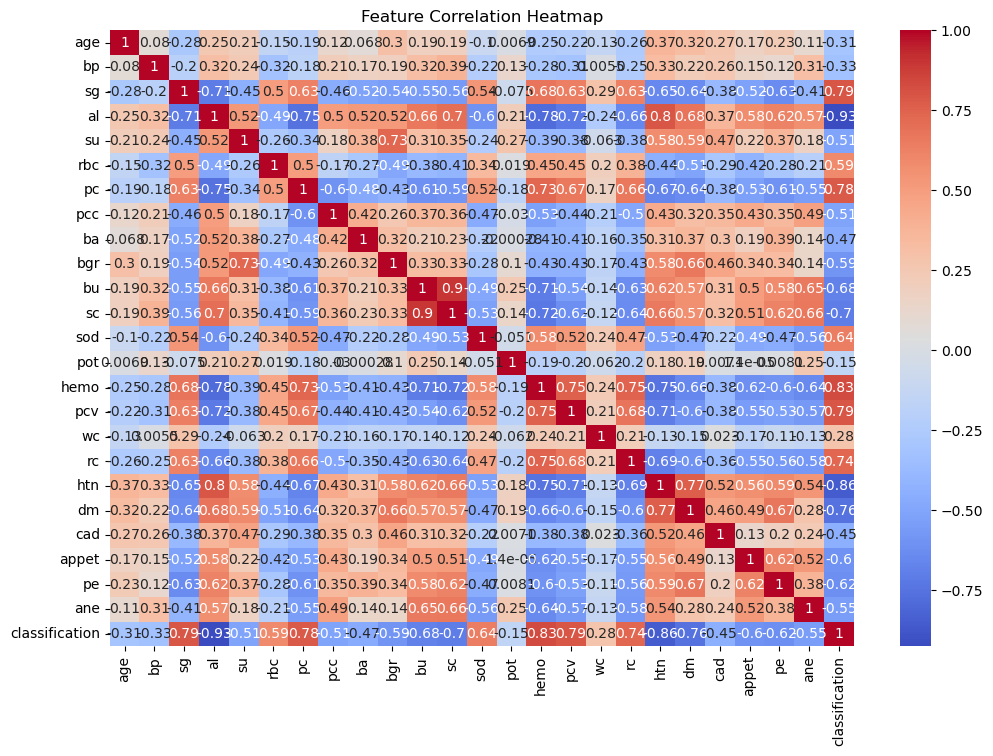

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
# Split features and target
X = df.drop('classification', axis=1)
y = df['classification']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[ 9  0]
 [ 0 23]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


K-Nearest Neighbors
Accuracy: 0.9375
Confusion Matrix:
 [[ 7  2]
 [ 0 23]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.92      1.00      0.96        23

    accuracy                           0.94        32
   macro avg       0.96      0.89      0.92        32
weighted avg       0.94      0.94      0.93        32


Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[ 9  0]
 [ 0 23]]
Classification Report:
               precision    recall  f1-score   support

   

C:\Users\Dell\AppData\Local\Temp\ipykernel_8440\568125038.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.values()), y=list(model_scores.keys()), palette='viridis')


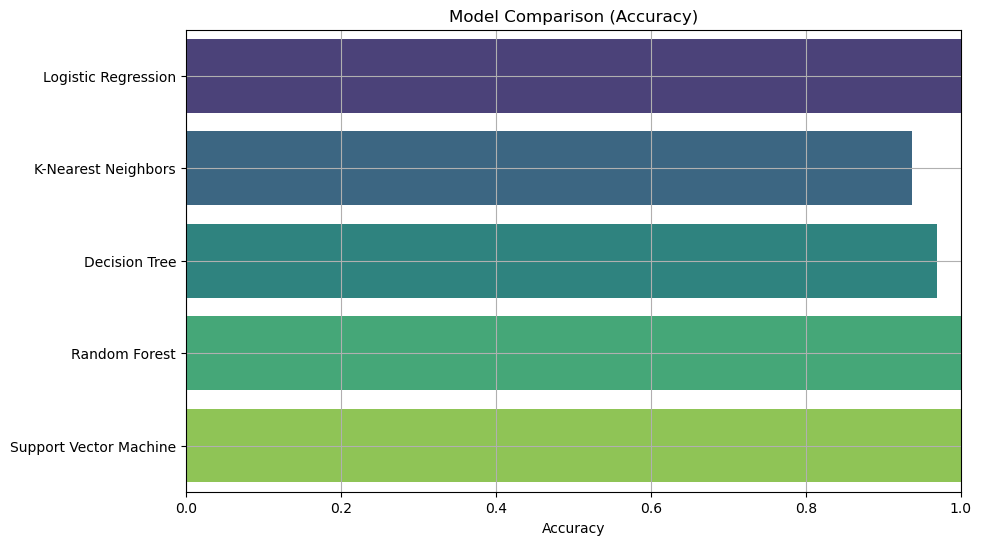

In [23]:
# Store accuracy scores
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_scores.values()), y=list(model_scores.keys()), palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Comparison (Accuracy)')
plt.xlim(0, 1)
plt.grid(True)
plt.show()


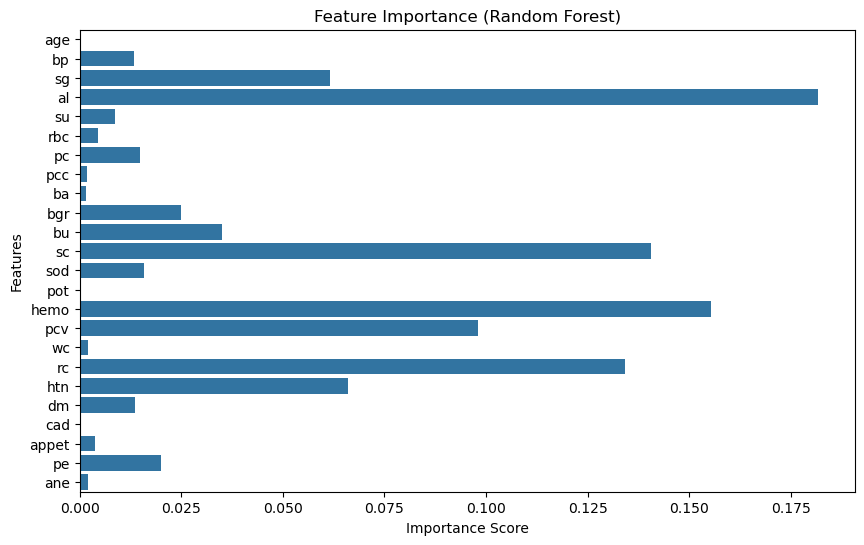

In [24]:
# Random Forest feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


<Figure size 500x400 with 0 Axes>

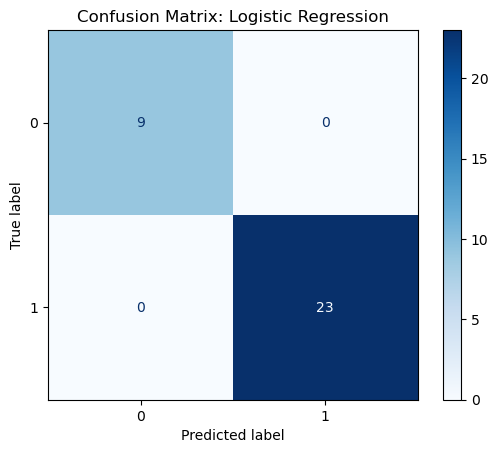

<Figure size 500x400 with 0 Axes>

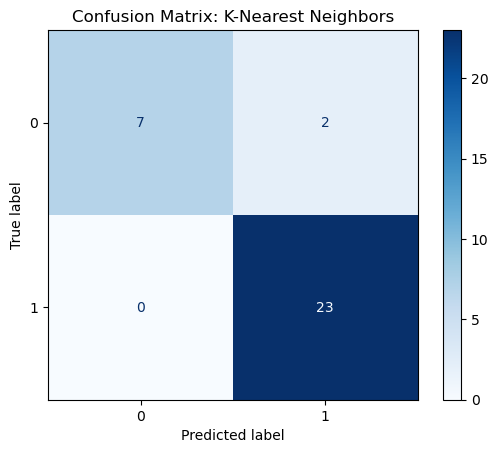

<Figure size 500x400 with 0 Axes>

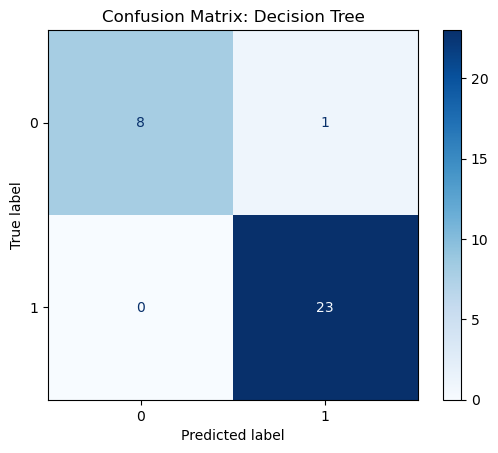

<Figure size 500x400 with 0 Axes>

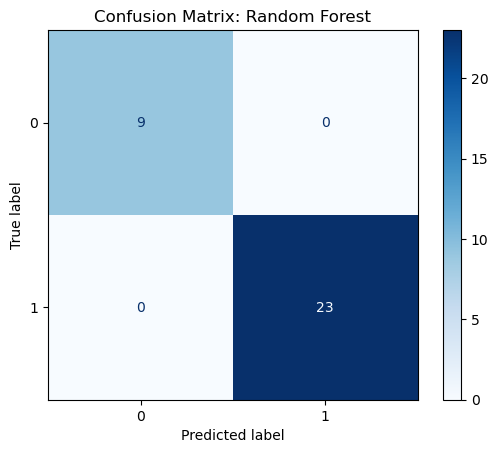

<Figure size 500x400 with 0 Axes>

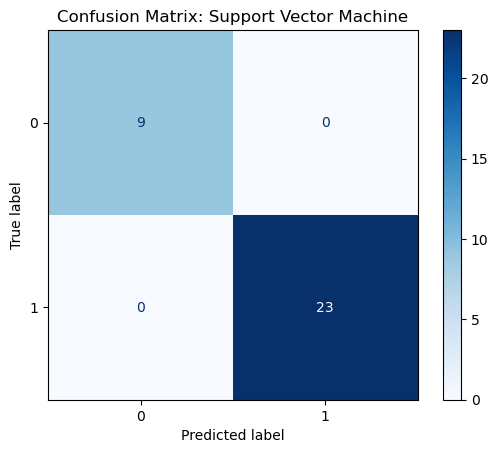

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('kidney_disease (1).csv')

df = df.dropna()

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('classification', axis=1)
y = df['classification']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # Important for ROC
}


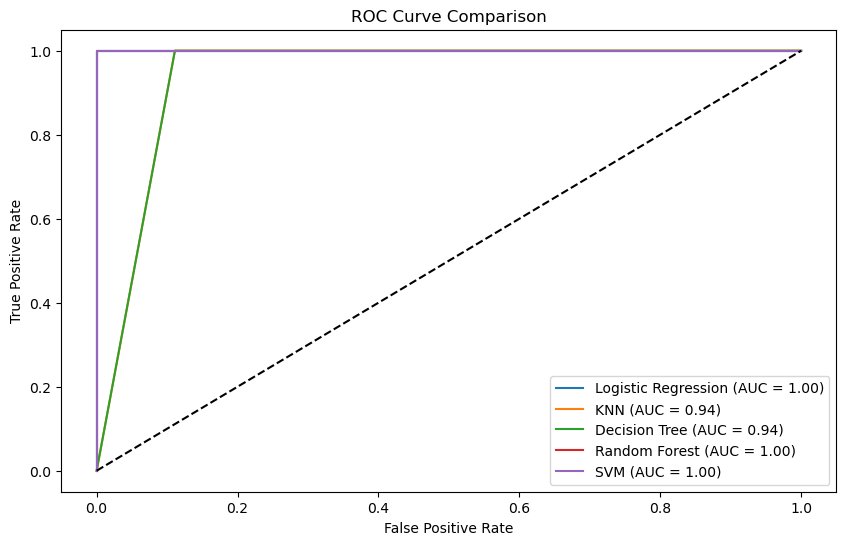

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}")


Logistic Regression: Mean CV Accuracy = 0.9873
KNN: Mean CV Accuracy = 0.9623
Decision Tree: Mean CV Accuracy = 0.9812
Random Forest: Mean CV Accuracy = 1.0000
SVM: Mean CV Accuracy = 1.0000


In [16]:
# Select only the 6 features
selected_features = ['age', 'bp', 'al', 'hemo', 'bgr', 'sc']
X = df[selected_features]
y = df['classification']  # assuming target is already encoded

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the new model
joblib.dump(model, 'kidney_model_6features.pkl')


['kidney_model_6features.pkl']